<a href="https://colab.research.google.com/github/yeedacoding/TensorFlow-DL/blob/main/NeuralNetwork_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손실 곡선

- keras의 fit() 메서드는 History 클래스 객체를 반환
- History 객체에는 훈련 과정에서 계산한 손실, 정확도 값이 저장되어 있음

In [ ]:
# 손실 곡선을 이용하여 그래프 그려보기

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# 모델을 만드는 함수로 정의해보기

def model_fn(a_layer = None) :
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))

  # model_fn() 함수에 a_layer 매개변수로 keras 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가
  if a_layer :
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [ ]:
# 모델 구조 확인해보기

model = model_fn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit() 메서드의 결과를 history 변수에 담기

model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

#### * verbose 매개변수*

- 훈련과정 출력을 조절
- 1( =default) : 에포크마다 진행 막대와 손실 등의 지표 출력
- 2 : 진행 막대를 빼고 출력
- 0 : 훈련과정 출력하지 않음

In [ ]:
# history 객체에는 훈련 측정값이 담겨 있는 history 딕셔너리가 들어 있음

print(history.history.keys())

dict_keys(['loss', 'accuracy'])


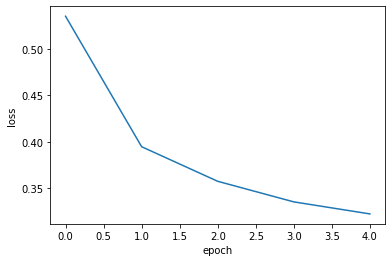

In [ ]:
# history 객체에 포함된 손실(loss)과 정확도(accuracy)는 에포크마다 계산한 값이 순서대로 나열된 리스트
# 그래프로 나타내보기

# 손실(loss) 그래프
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

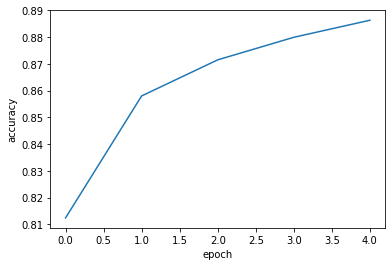

In [ ]:
# 정확도(accuracy) 그래프

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

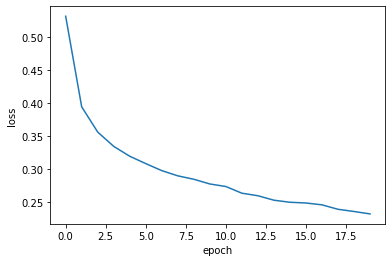

In [ ]:
# 에포크 늘려서 훈련하고 그래프로 손실값 그려보기

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 에포크에 따른 overfitting, underfitting을 파악하려면 훈련 세트에 대한 점수, 검증 세트에 대한 점수 둘 다 필요
# 두 세트에 대한 손실값을 그래프로 그려 overfitting, underfitting 확인해보기

# validation_data 매개변수에 검증에 사용할 입력과 타깃값 전달(튜플)

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs= 20, verbose = 0, validation_data = (val_scaled, val_target))

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


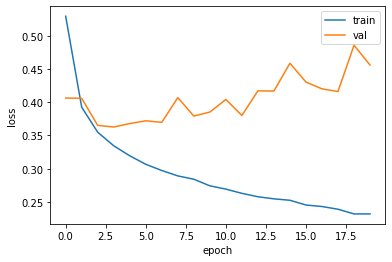

In [ ]:
# 훈련 세트의 손실도와 검증 세트의 손실도를 그래프로 그려 overfitting, underfitting 확인해보기

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 검증 손실

 - 초기에는 훈련 세트와 검증 세트의 손실도가 감소하다가
 - 2.5 epoch를 지나면서 검증 세트의 손실도가 증가
 - epoch가 진행되면서 훈련 세트의 손실도는 꾸준히 감소하지만 검증 세트의 손실도는 전체적으로 증가하게 된다 -> overfitting

### 신경망에서 overfitting을 규제하는 방법 1 : 옵티마이저 조정

- 옵티마이저 하이퍼파라미터 조정하여 overfitting을 규제하기
- Adam 옵티마이저는 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정 가능

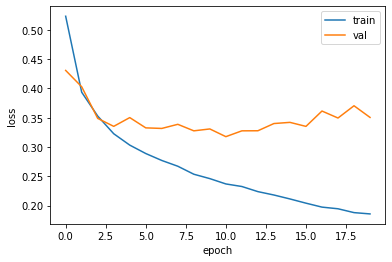

In [ ]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- Adam 옵티마이저를 사용하여 overfitting을 조금 완화할 수 있었음

### 신경망에서 overfitting을 규제하는 방법 2 : 드롭아웃 (Drop Out)

- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(off, 즉 뉴런의 출력을 0으로 만들어버림) overfitting을 규제
- 하이퍼파라미터를 통해 드롭할 뉴런의 양을 조절할 수 있음
- 뉴런은 랜덤하게 드롭아웃됨
- 드롭아웃이 overfitting을 규제하는 이유 : 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야하기 때문
- keras.layers 패키지에서 Dropout 클래스 제공
- 어떤 층의 뒤에 드롭아웃을 두어 이 층에서 랜덤하게 뉴런의 출력을 0으로 만들어버림
- 드롭아웃은 층처럼 사용되지만 훈련되는 모델 파라미터는 없음
- 드롭아웃 층의 입력과 출력의 크기는 같음(일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음)

In [ ]:
# 30%를 드롭아웃해보기
# 은닉층과 출력층 사이에 드롭아웃 층 생성

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하면 안됨
- tensorflow, keras에서는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용시키지 않는다

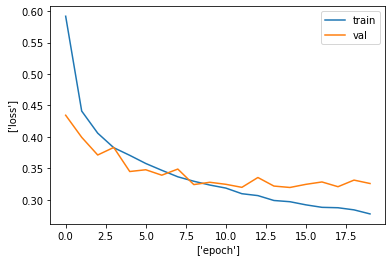

In [ ]:
# 드롭아웃을 적용한 모델의 훈련세트, 검증세트의 손실도 비교하기

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 10번째정도의 에포크에서 검증 손실의 감소가 멈추지만 크게 상승하지 않음
- 하지만 20번의 에포크를 돌렸기 때문에 모델은 overfitting이 됨
- 에포크 횟수 10번으로 줄여보자

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, validation_data = (val_scaled, val_target))

# 모델 저장과 복원

- save_weights() : 훈련된 모델의 파라미터를 저장(w,b)
- save() : 모델 구조와 모델 파라미터를 모두 저장

In [ ]:
# 훈련된 모델의 모델 파라미터 저장

model.save_weights('model-weights.h5')

In [ ]:
# 훈련된 모델 구조와 모델 파라미터를 함께 저장

model.save('model-whole.h5')

In [ ]:
# 두 개의 파일이 만들어졌는지 확인해보기

!ls -al *.h5

-rw-r--r-- 1 root root 332480 Nov  1 12:06 model-weights.h5
-rw-r--r-- 1 root root 981736 Nov  1 12:06 model-whole.h5


### 1. 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터 읽어서 사용해보기

- 훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터를 적재
- save_weights()와 load_weights() 메서드는 서로 쌍을 이룸
- load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 함

In [ ]:
# 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터 읽어서 사용해보기

# 새로운 model 만들기
model = model_fn(keras.layers.Dropout(0.3))

# 새로운 model에 model-weights.h5의 모델 파라미터 적재
model.load_weights('model-weights.h5')

In [ ]:
# 새롭게 만든 model의 검증 정확도 확인해보기
# keras의 predict() 메서드 사용 -> 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환
# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 개수는 12,000개이기 때문에 predict() 메서드는 (12000, 10) 크기의 배열을 반환
# 10개 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도 확인해보기

import numpy as np

# 각 행의 최댓값의 인덱스를 선택
val_labels = np.argmax(model.predict(val_scaled), axis = -1)

# argmax()에서 고른 인덱스(val_scaled)와 타깃(val_target)을 비교
# 두 배열에서 각 위치의 값이 같으면 1, 다르면 0
# 이를 평균하면 정확도가 됨
print(np.mean(val_labels == val_target))

0.88075


### 2. model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용해보기

- 모델이 저장된 파일을 읽을 때는 keras가 제공하는 load_model() 함수를 사용

In [ ]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

# 같은 모델을 저장하고 다시 불러들였기 때문에 위와 같은 정확도가 출력됨

375/375 [==============================] - 1s 1ms/step - loss: 0.3317 - accuracy: 0.8808


[0.331672728061676, 0.8807500004768372]

1. 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점 확인
2. 그 다음 모델을 overfitting 되지 않는 에포크만큼 다시 훈련

# 콜백(callback)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- keras.callbacks 패키지 아래에 있는 클래스들
- fit() 메서드에 callbacks 매개변수에 리스트로 전달하여 사용
- ModelCheckpoint 콜백은 기본적으로 모델이 훈련된 후 최상의 검증 점수를 만드는 모델을 저장함

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

- model_fn() 함수로 모델을 만들고 compile() 메서드를 호출
- ModelCheckpoint 클래스의 객체 checkpoint_cb를 만든 후
- fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달
- 모델이 훈련된 후 best-model.h5 파일에 최상의 검증 점수를 낸 모델이 저장됨

In [ ]:
# 모델을 다시 불러와서 예측 수행해보기

model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3288 - accuracy: 0.8843


[0.3287601172924042, 0.8843333125114441]

## **조기 종료 (early stopping)**

- ModelCheckpoint 콜백이 최상의 검증 점수를 낸 모델을 저장했음
- 하지만 여전히 에포크는 20회를 수행함 -> 컴퓨터 자원 + 시간 낭비
- overfitting이 시작되기 전에 훈련을 미리 중지하는 것 = **조기 종료(early stopping)**
- keras에서 **EarlyStopping** 콜백 제공
- **patience** 매개변수 : 검증 점수가 향상되지 않더라도 계속 참고 진행할 에포크 횟수로 지정
- ex) patience = 2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지
- **restore_best_weights** 매개변수 : True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
# 훈련을 마치고 몇 번째 에포크에서 훈련이 중지되었는지 early_stopping_cb 객체의 stopped_epoch 속성에서 확인해보기

print(early_stopping_cb.stopped_epoch)

9


- 에포크가 0에서 시장하기 때문에
- 9는 10번째 에프코에서 훈련이 중지되었다는 것을 의미
- patience = 2로 주었기 때문에 최상의 모델은 7번째 에포크일 것임

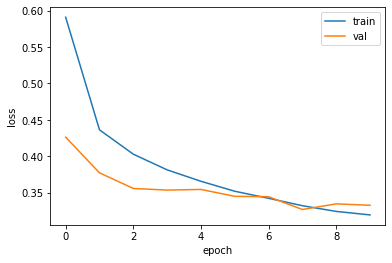

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 예상대로 7번째 에포크 이후부터는 검증 세트의 손실도가 증가하여 모델이 overfitting 되는 것을 볼 수 있음

In [ ]:
# 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인해보기

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3271 - accuracy: 0.8799


[0.32710134983062744, 0.8799166679382324]